# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mouse_ids = duplicate_rows["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[~combined_data["Mouse ID"].isin(duplicate_mouse_ids)]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_clean_mice = clean_data["Mouse ID"].nunique()
num_clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group by 'Drug Regimen'
grouped_data = clean_data.groupby("Drug Regimen")

# Calculate statistics
mean_tumor_volume = grouped_data["Tumor Volume (mm3)"].mean()
median_tumor_volume = grouped_data["Tumor Volume (mm3)"].median()
variance_tumor_volume = grouped_data["Tumor Volume (mm3)"].var()
std_dev_tumor_volume = grouped_data["Tumor Volume (mm3)"].std()
sem_tumor_volume = grouped_data["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame
summary_stats = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_dev_tumor_volume,
    "Tumor Volume SEM": sem_tumor_volume
})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_advanced = clean_data.groupby("Drug Regimen").agg(
    Mean_Tumor_Volume=("Tumor Volume (mm3)", "mean"),
    Median_Tumor_Volume=("Tumor Volume (mm3)", "median"),
    Tumor_Volume_Variance=("Tumor Volume (mm3)", "var"),
    Tumor_Volume_Std_Dev=("Tumor Volume (mm3)", "std"),
    Tumor_Volume_SEM=("Tumor Volume (mm3)", "sem")
)

summary_stats_advanced

,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

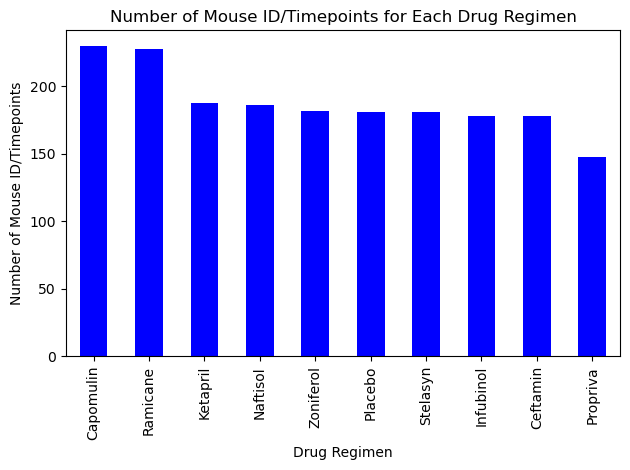

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_data['Drug Regimen'].value_counts()

drug_counts.plot(kind='bar', color='blue')
plt.title('Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.tight_layout()
plt.show()

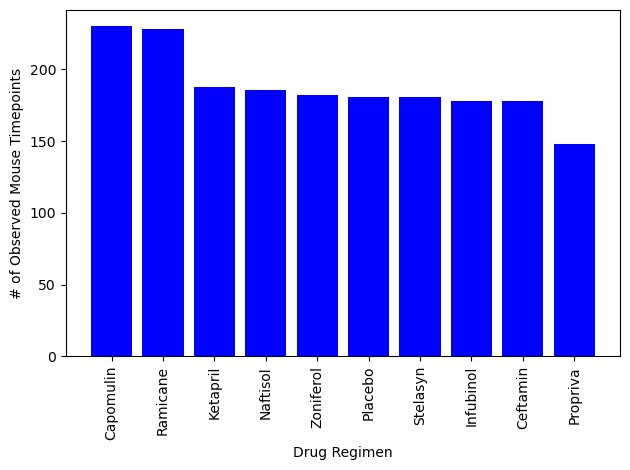

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_names = drug_counts.index
counts = drug_counts.values

plt.bar(drug_names, counts, color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

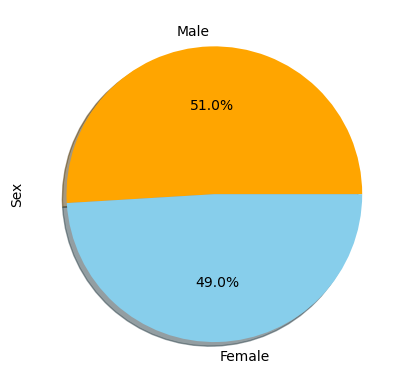

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_data['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=['orange', 'skyblue'], shadow=True, ylabel='Sex')
plt.show()


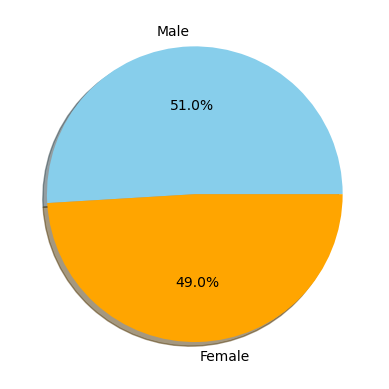

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_counts.index
sizes = gender_counts.values

plt.pie(sizes, labels=labels, colors=['skyblue','orange'], autopct='%1.1f%%', startangle=0, shadow=True)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, clean_data, on=["Mouse ID", "Timepoint"], how="left")

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume = merged_data[merged_data["Drug Regimen"].isin(treatments)]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_vol_data.append(final_tumor_vol)
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = final_tumor_vol[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}\n")
# print(tumor_vol_data)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



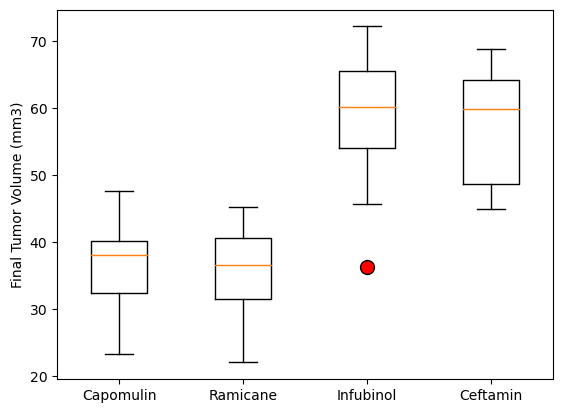

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, vert=True, flierprops=dict(marker = 'o', markerfacecolor='red', markersize='10'))
ax.set_xticklabels(treatments)
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

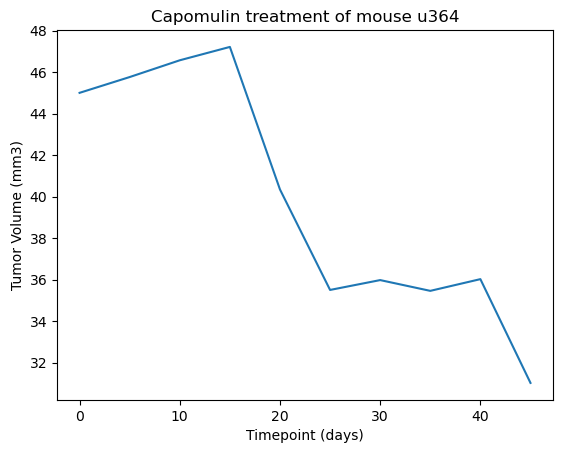

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice = clean_data[clean_data["Drug Regimen"] == "Capomulin"]["Mouse ID"].unique()
chosen_mice = capomulin_mice[4]
mouse_data = clean_data[clean_data["Mouse ID"] == chosen_mice]

plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of mouse {chosen_mice}")
plt.show()

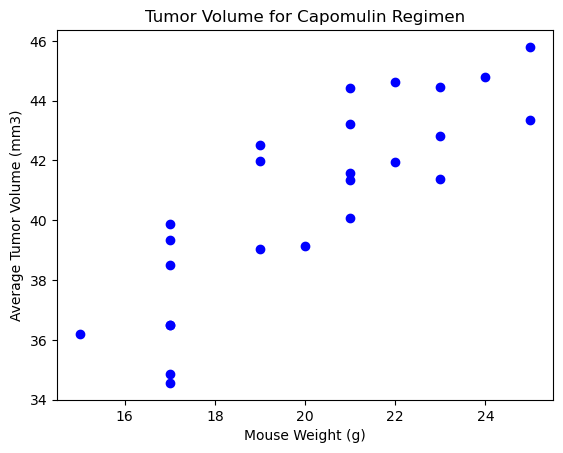

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
grouped_capomulin = capomulin_data.groupby("Mouse ID").agg({
    "Weight (g)": "mean",
    "Tumor Volume (mm3)": "mean"
})

plt.scatter(grouped_capomulin["Weight (g)"], grouped_capomulin["Tumor Volume (mm3)"], color='blue')
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Tumor Volume for Capomulin Regimen")
plt.show()

## Correlation and Regression

The correlation coefficient is 0.84


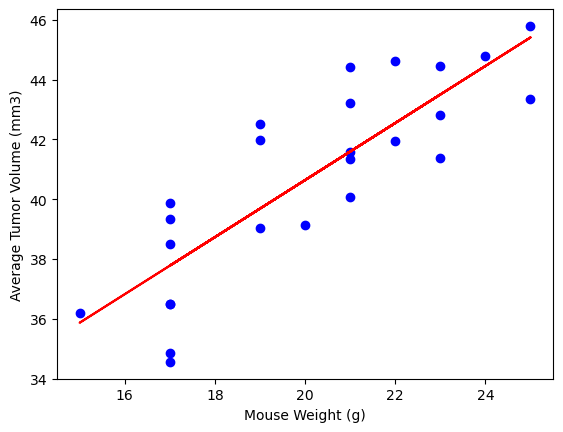

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient, _ = st.pearsonr(grouped_capomulin["Weight (g)"], grouped_capomulin["Tumor Volume (mm3)"])
print(f"The correlation coefficient is {correlation_coefficient:.2f}")

# Calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(grouped_capomulin["Weight (g)"], grouped_capomulin["Tumor Volume (mm3)"])
regress_values = grouped_capomulin["Weight (g)"] * slope + intercept

plt.scatter(grouped_capomulin["Weight (g)"], grouped_capomulin["Tumor Volume (mm3)"], color='blue')
plt.plot(grouped_capomulin["Weight (g)"], regress_values, color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
